<a href="https://colab.research.google.com/github/bernardowenzel/MVP_SPRINT_1/blob/main/MVP_Bernardo_Wenzel_Sprint_3_Analise_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise Exploratória e Pré-Processamento de Dados**

## **1 - Definição do Problema**

Uma universidade conceituada instalada na zona sul da cidade planeja expandir e inaugurar uma nova filial na zona oeste focada em cursos de pós-graduação.


Para isso, algumas variáveis precisam ser consideradas e avaliadas para auxiliar na tomada de decisão.


Neste projeto, o objetivo é analisar o perfil sócio-econômico dos adultos moradores do bairro onde planeja-se inaugurar essa nova filial. Em cima de dados como renda média e pós graduação, busca-se entender se os moradores desse bairro seriam potenciais alunos da pós-graduação.


Este projeto irá analisar as informações e preparar os dados para a criação de um modelo de machine learning que visa identificar se os alunos recém graduados possuem interesse em cursar uma pós-graduação.


Trata-se de um projeto de aprendizado supervisionado com ênfase na análise exploratória e pré-processamento dos dados obtidos.


Detalhamento do dataset:


*   USER ID: Identificador único do morador - Formato Int
*   Gender: Descrição do gênero do morador  - Formato String
*   Age: Idade do morador - Formato Int
*   AnnualSalary: Salário anual do morador - Formato Int
*   Masters_Degree: Flag para identificar se possui pós-graduação - Formato Int

## **2 - Análise dos Dados**

###**Importação das Bibliotecas**

In [43]:

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as ms # para tratamento de missings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler      ## Para padronizar os atributos
from sklearn.preprocessing import MinMaxScaler        ## Para normalizar os atributos
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding
from sklearn import preprocessing                     ## Transformar o atributo "Sexo" em 0 e 1
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold             ## validação cruzada entre os subconjuntos criados para entender como o modelo generaliza
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score   ## validação cruzada retornando uma lista com a acurácia dos testes, métrica utilizada nesse modelo
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

###**Carga do Dataset**

In [44]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/bernardowenzel/MVP_SPRINT_1/main/student_masters_dataset.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,User ID,Gender,Age,AnnualSalary,Masters_Degree
0,385,Male,35,20000,0
1,681,Male,40,43500,1
2,353,Male,49,74000,0
3,895,Male,40,107500,0
4,661,Male,25,79000,0


In [45]:
# Verificando se possui algum campo com dados nulos
dataset.isnull().any()

User ID           False
Gender            False
Age               False
AnnualSalary      False
Masters_Degree    False
dtype: bool

<Axes: >

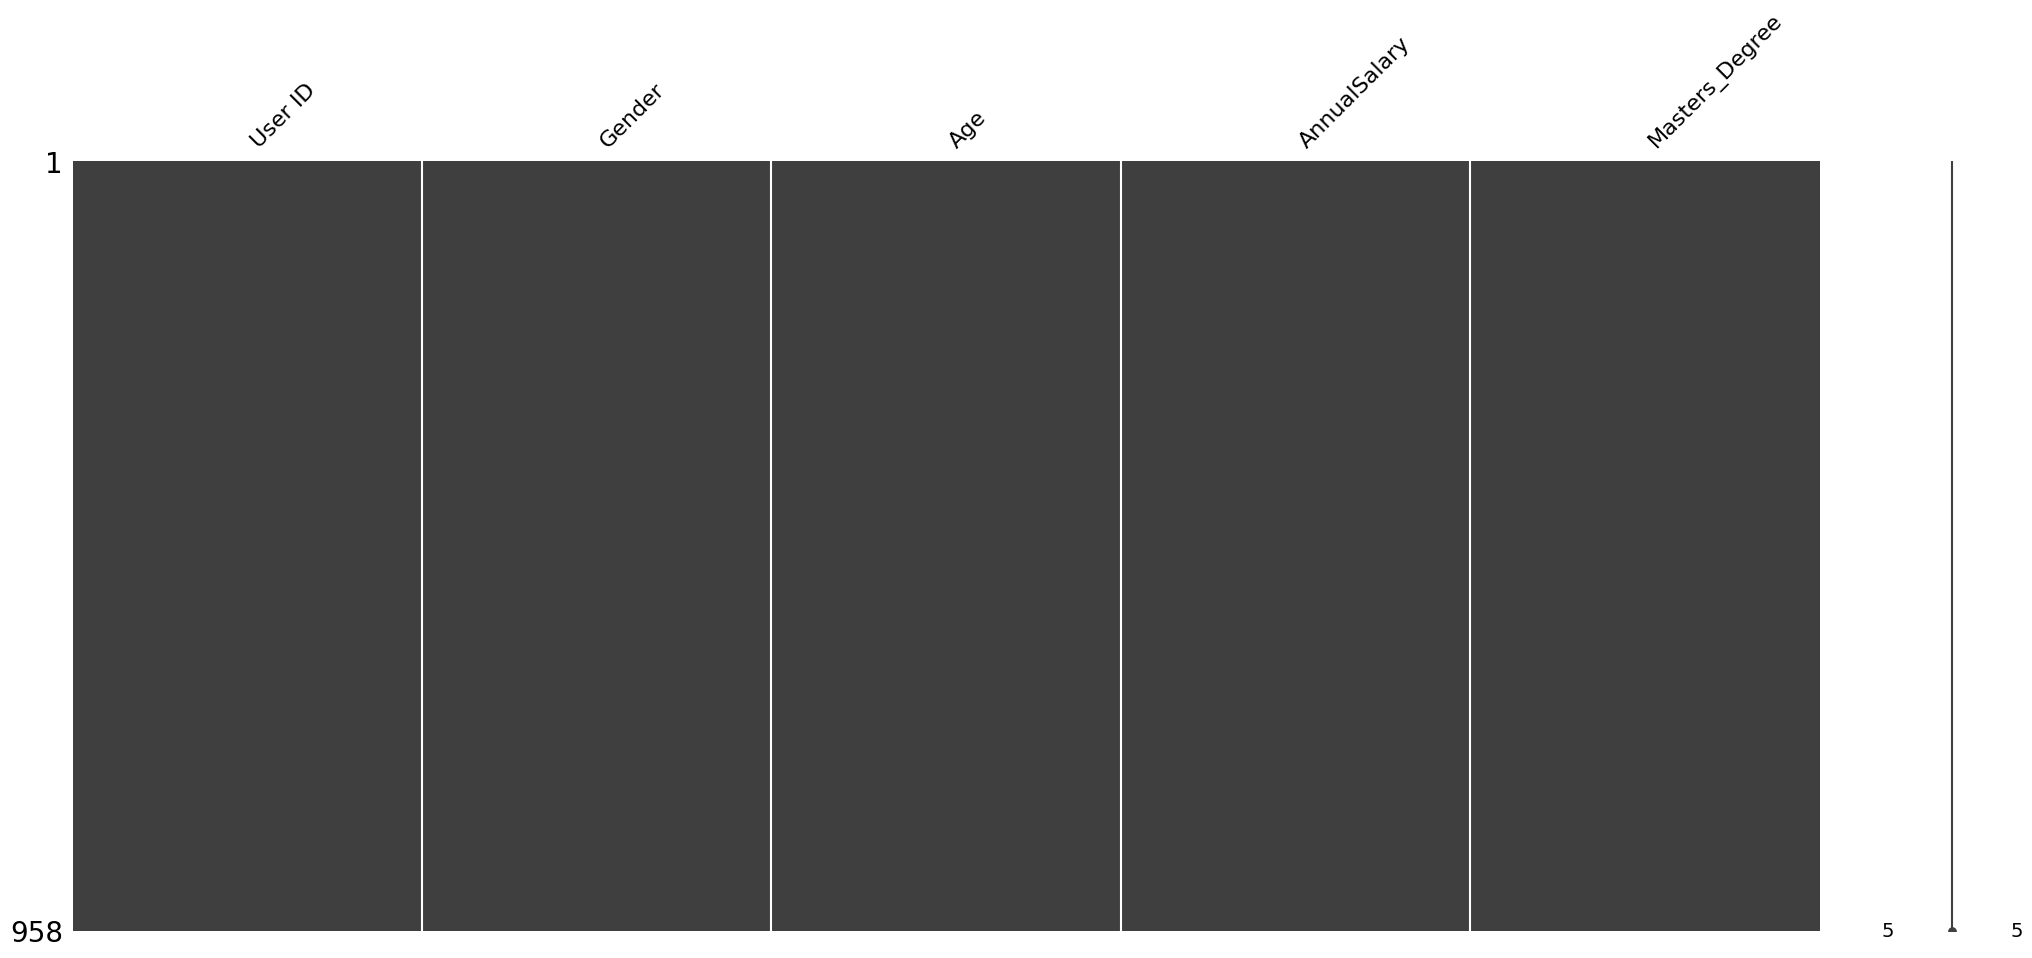

In [46]:
# mostrando representação em formato de matriz da ausência de valores no conjunto de dados
ms.matrix(dataset)

In [47]:
# Gerando dataframe do dataset bruto
df = dataset
display(df)

,User ID,Gender,Age,AnnualSalary,Masters_Degree
0,385,Male,35,20000,0
1,681,Male,40,43500,1
2,353,Male,49,74000,0
3,895,Male,40,107500,0
4,661,Male,25,79000,0
...,...,...,...,...,...
953,863,Male,38,59000,0
954,800,Female,47,23500,0
955,407,Female,28,138500,1
956,299,Female,48,134000,1


In [48]:
# Transformando dados do campo "Gender" em binário, onde 1 = Masculino e 0 igual a Feminino
df['Gender'] = df['Gender'].replace({'Male' : '1',
                                 'Female': '0'}, regex=True)

# Convertendo o formato da coluna Sexo de object para int
df['Gender'] = df['Gender'].astype(int)

display(df)

df.info()

,User ID,Gender,Age,AnnualSalary,Masters_Degree
0,385,1,35,20000,0
1,681,1,40,43500,1
2,353,1,49,74000,0
3,895,1,40,107500,0
4,661,1,25,79000,0
...,...,...,...,...,...
953,863,1,38,59000,0
954,800,0,47,23500,0
955,407,0,28,138500,1
956,299,0,48,134000,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   User ID         958 non-null    int64
 1   Gender          958 non-null    int64
 2   Age             958 non-null    int64
 3   AnnualSalary    958 non-null    int64
 4   Masters_Degree  958 non-null    int64
dtypes: int64(5)
memory usage: 37.5 KB


In [49]:
# exibindo a quantidade de linhas por coluna
df.count()

User ID           958
Gender            958
Age               958
AnnualSalary      958
Masters_Degree    958
dtype: int64

In [50]:
# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

df_raw = dataset

display(df_raw)

,User ID,Gender,Age,AnnualSalary,Masters_Degree
0,385,Male,35,20000,0
1,681,Male,40,43500,1
2,353,Male,49,74000,0
3,895,Male,40,107500,0
4,661,Male,25,79000,0
...,...,...,...,...,...
953,863,Male,38,59000,0
954,800,Female,47,23500,0
955,407,Female,28,138500,1
956,299,Female,48,134000,1


###**Análise Exploratória dos Dados**

Após conhecer um pouco sobre o dataset, nessa etapa serão realizadas algumas análises pra entender características da base e identificar oportunidades, correlações e padrões que os dados apresentam.

Para essa etapa, serão utilizadas as opções presentes nas bibliotecas matplotlib, seaborn e pandas.

___
**Sumário Estatístico**

In [51]:
# exibindo um sumário estatístico
df.describe()

,User ID,Gender,Age,AnnualSalary,Masters_Degree
count,958.000000,958.000000,958.000000,958.000000,958.000000
mean,501.161795,0.482255,40.998956,73324.112735,0.510438
std,288.884389,0.499946,10.031247,34700.609533,0.500152
min,1.000000,0.000000,22.000000,15000.000000,0.000000
25%,252.250000,0.000000,34.000000,47000.000000,0.000000
50%,498.500000,0.000000,40.000000,72000.000000,1.000000
75%,752.750000,1.000000,48.000000,90500.000000,1.000000
max,1000.000000,1.000000,63.000000,152500.000000,1.000000


___
**Gráfico de barras para contar quantas pessoas possuem pós-graduação:**

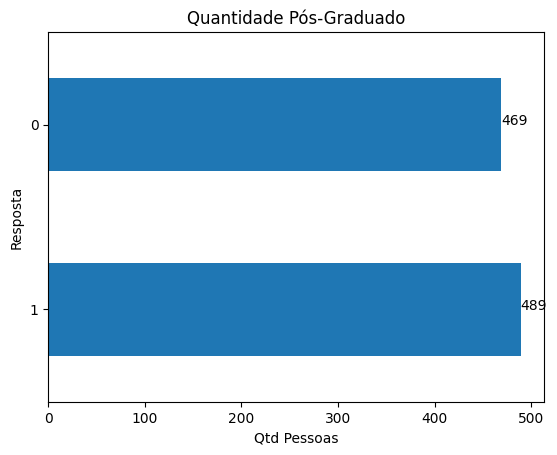

In [52]:
# Criando gráfico de barras
df.Masters_Degree.value_counts().plot(kind = 'barh')

# Contagem dos registros para plotar como rótulo de dados
contagem = df.Masters_Degree.value_counts()

# Incluindo rótulos de dados no gráfico
for i, v in enumerate(contagem):
    plt.text(v, i, str(v))

plt.title("Quantidade Pós-Graduado")
plt.xlabel("Qtd Pessoas")
plt.ylabel("Resposta");

# Exibir o gráfico
plt.show()

___
**Contagem de pessoas por gênero**

In [53]:
# Contagem por gênero
qtd_gender = df_raw['Gender'].value_counts()

# Exibindo a contagem
display(qtd_gender)

Female    496
Male      462
Name: Gender, dtype: int64

A base possui mais pessoas do gênero feminino.

___
**Identificar perfil das pessoas que possuem pós-graduação agrupando pelo gênero**

Masters_Degree    0    1
Gender                  
Female          231  265
Male            238  224


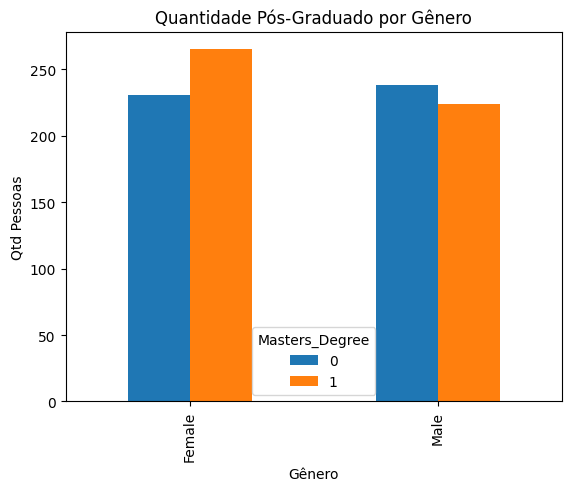

In [54]:
#Agrupando por gênero e resposta e contando as ocorrências
contagem_por_genero_resposta = df_raw.groupby(['Gender', 'Masters_Degree']).size().unstack()

# Exibindo a contagem
print(contagem_por_genero_resposta)

# Criando gráfico de barras
contagem_por_genero_resposta.plot(kind = 'bar')

plt.title("Quantidade Pós-Graduado por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Qtd Pessoas");

# Exibir o gráfico
plt.show()

Analisando o gráfico e tabela acima, percebe-se que há mais mulheres com pós graduação do que homens.

Portanto, a interpretação dos dados, até agora, indicam para maior tendência do público feminino aderir aos cursos de pós-graduação ofertados pela universidade.

___
**Análise com base no salário anual**

Gender
Female    75734.879032
Male      70735.930736
Name: AnnualSalary, dtype: float64

Masters_Degree             0             1
Gender                                    
Female          78333.333333  73469.811321
Male            72378.151261  68991.071429


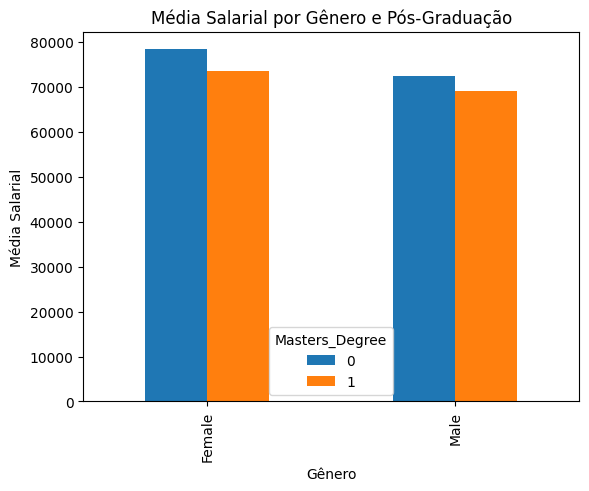

In [55]:
# Exibindo a média de salário por gênero
media_salario_por_genero = df_raw.groupby('Gender')['AnnualSalary'].mean()

# Exibindo a contagem
display(media_salario_por_genero)

# Agrupando por gênero e resposta e calculando a média salarial
media_salarial_por_genero_resposta = df_raw.groupby(['Gender', 'Masters_Degree'])['AnnualSalary'].mean().unstack()

# Exibindo a média salarial
print(media_salarial_por_genero_resposta)

# Criando gráfico de barras
media_salarial_por_genero_resposta.plot(kind='bar')

plt.title("Média Salarial por Gênero e Pós-Graduação")
plt.xlabel("Gênero")
plt.ylabel("Média Salarial")

# Exibir o gráfico
plt.show()

Agora, analisando o espectro salarial, é possível reparar que a média salarial do público feminino é maior que a do público masculino, sendo pós-graduado ou não.

Isso corrobora a interpretação anterior sobre uma tendência maior a adesão dos cursos de pós graduação pelo público feminino.

___
**Identificando correlação entre as variáveis da base**

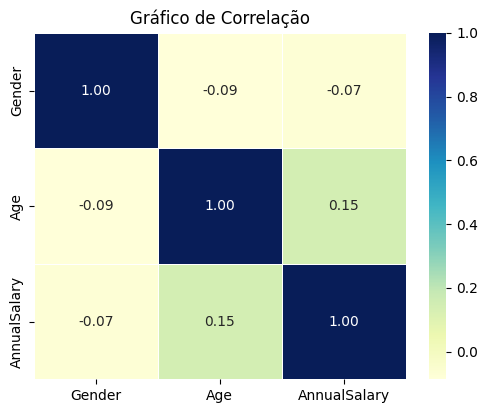

In [56]:
# Selecionar as colunas de interesse
atributos_corr = ["Gender", "Age", "AnnualSalary"]

# Calcular a matriz de correlação
correlation_matrix = df[atributos_corr].corr()

# Criar o heatmap usando o Seaborn
plt.figure(figsize=(6, 4.5))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Gráfico de Correlação")
plt.show()

As variáveis "Gender", "Age" e "AnnualSalary" mostram baixa correlação no heatmap, indicando uma fraca relação linear entre elas. Essa baixa correlação sugere que mudanças em uma variável não têm uma ligação forte com mudanças nas outras.

___
**Analisando a distribuição das pessoas de acordo com a idade**

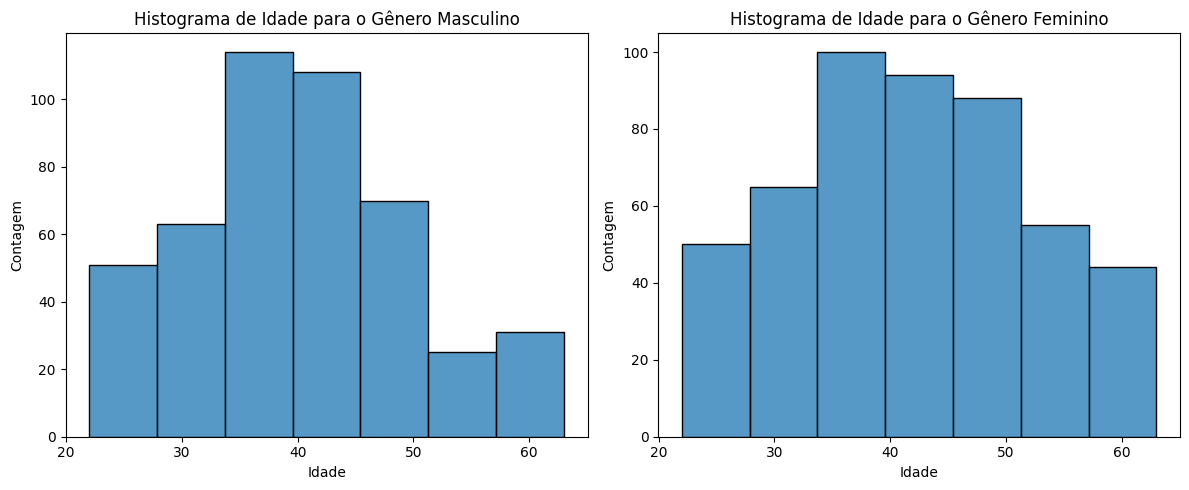

In [57]:
# Filtrar apenas pessoas do gênero Masculino
df_male = df_raw[df_raw['Gender'] == 'Male']

# Configurar subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Criar histograma para o gênero masculino
sns.histplot(df_male['Age'], bins=7, ax=axes[0])
axes[0].set_title("Histograma de Idade para o Gênero Masculino")
axes[0].set_xlabel("Idade")
axes[0].set_ylabel("Contagem")

# Criar histograma para o gênero Feminino
df_female = df_raw[df_raw['Gender'] == 'Female']
sns.histplot(df_female['Age'], bins=7, ax=axes[1])
axes[1].set_title("Histograma de Idade para o Gênero Feminino")
axes[1].set_xlabel("Idade")
axes[1].set_ylabel("Contagem")

# Ajustar o layout
plt.tight_layout()

# Exibir os histogramas
plt.show()


Percebe-se que existe uma concentração maior de pessoas entre 35 e 45 anos para ambos os gêneros

In [58]:
df.head()

,User ID,Gender,Age,AnnualSalary,Masters_Degree
0,385,1,35,20000,0
1,681,1,40,43500,1
2,353,1,49,74000,0
3,895,1,40,107500,0
4,661,1,25,79000,0


## **3 - Pré-processamento dos Dados**

Nesta etapa, serão realizados tratamentos para padronização e normalização dos dados para prepará-los para a criação de um modelo de machine learning.

___
###**Normalização**

In [59]:
# Remover a coluna "User ID" antes da normalização porque é o identificador único da base
df = df.drop("User ID", axis=1)

# Separar os atributos (X) e o target (y)
X = df.drop("Masters_Degree", axis=1)
y = df["Masters_Degree"]

# Normalizar os atributos usando Min-Max Scaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Exibir o DataFrame normalizado
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)
df_normalized["Masters_Degree"] = y  # Adicionar a coluna target de volta

display(df_normalized)


,Gender,Age,AnnualSalary,Masters_Degree
0,1.0,0.317073,0.036364,0
1,1.0,0.439024,0.207273,1
2,1.0,0.658537,0.429091,0
3,1.0,0.439024,0.672727,0
4,1.0,0.073171,0.465455,0
...,...,...,...,...
953,1.0,0.390244,0.320000,0
954,0.0,0.609756,0.061818,0
955,0.0,0.146341,0.898182,1
956,0.0,0.634146,0.865455,1


In [60]:
df_normalized.describe()

,Gender,Age,AnnualSalary,Masters_Degree
count,958.000000,958.000000,958.000000,958.000000
mean,0.482255,0.463389,0.424175,0.510438
std,0.499946,0.244665,0.252368,0.500152
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.292683,0.232727,0.000000
50%,0.000000,0.439024,0.414545,1.000000
75%,1.000000,0.634146,0.549091,1.000000
max,1.000000,1.000000,1.000000,1.000000


Percebe-se que na normalização, os atributos Age e AnnualSalary foram normalizados de 0 a 1, conforme visualização dos atributos estatísticos acima.

A normalização para o atributo AnnualSalary é importante porque, ao analisar os dados na etapa de Análise Exploratório, nota-se uma discrepância significativa entre os valores mínimo e máximo, por exemplo.

Dessa maneira, a normalização atua para reduzir as diferenças nas escalas e não prejudicar o desempenho do modelo.

**Separar em Treino e Teste**

In [61]:
# Dividir o dataset em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir as dimensões dos conjuntos de treino e teste
print("Dimensões do conjunto de treino:", X_train.shape, y_train.shape)
print("Dimensões do conjunto de teste:", X_test.shape, y_test.shape)

Dimensões do conjunto de treino: (766, 3) (766,)
Dimensões do conjunto de teste: (192, 3) (192,)


___
### **Padronização**

In [62]:
# Separar as features (X) e o target (y)
X = df.drop("Masters_Degree", axis=1)

# Aplicar a padronização usando StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Exibir o DataFrame padronizado
df_standardized = pd.DataFrame(X_standardized, columns=X.columns)
df_standardized["Masters_Degree"] = df["Masters_Degree"]  # Adicionar a coluna target de volta
print(df_standardized)

       Gender       Age  AnnualSalary  Masters_Degree
0    1.036143 -0.598339     -1.537494               0
1    1.036143 -0.099636     -0.859918               1
2    1.036143  0.798029      0.019488               0
3    1.036143 -0.099636      0.985393               0
4    1.036143 -1.595745      0.163653               0
..        ...       ...           ...             ...
953  1.036143 -0.299118     -0.413007               0
954 -0.965117  0.598548     -1.436578               0
955 -0.965117 -1.296523      1.879216               1
956 -0.965117  0.698288      1.749467               1
957 -0.965117  0.299326      0.005071               1

[958 rows x 4 columns]


Assim como feito na Normalização anteriormente, padronizar dados em modelos de machine learning é crucial para garantir escalas comparáveis, prevenindo influências desproporcionais em algoritmos sensíveis à escala.

___
### **One Hot Encoding**

Como o dataset foi tratado na etapa inicial deste estudo, o atributo categórico do dataset "Gender" foi alterado para 1 e 0 referentes aos valores "Male" e "Female".

Sendo assim, o One Hot Encoding não se faz necessário para esse caso.

Para fins de análise e desenvolvimento completo deste projeto, será utilizado como referência o dataset original "df_raw" para aplicação desse módulo.

In [63]:
# definindo o transformador como one hot encoding
encoder = OneHotEncoder(sparse=False)

# transformando os dados
onehot = encoder.fit_transform(df_raw)
print(onehot)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


Essa ferramenta é utilizada em modelos de machine learning com atributos categóricos para converter essas variáveis em um formato numérico, permitindo que os algoritmos interpretem e processem essas características de maneira eficaz.

## **4 - Conclusão do Modelo**

___
**Análise**

Este MVP consiste na análise exploratória e pré-processamento de dados para a criação de um modelo de machine learning.

Em cima das análises feitas na primeira etapa do projeto, observa-se que o dataset está bem dividido entre o público masculino e feminino e também entre os que possuem ou não pós-graduação.

A análise exploratória realizada indicou que há uma presença maior do público feminino com pós-graduação. Também é possível notar que a média de salário anual do público feminino é maior, indicando uma maior capacidade de incluir nos custos pessoais o investimento em pós-graduação.

Fatores sociais e culturais das pessoas da região de interesse não estão presentes no dataset para contribuirem com a análise e entendimento do perfil daquela comunidade.

___
**Considerações Finais**

Algumas observações pessoais sobre a pós-graduação:

A utilização da linguagem Python para a análise de indicadores e tratamento das bases é muito performática e rápida. É possível gerar diversos indicadores ricos em informação com poucas linhas de código através das bibliotecas disponíveis e com rápido tempo de processamento.

Este curso foi fundamental para meu aprendizados e familiarização com esta linguagem cada vez mais utilizada no mercado de trabalho, principalmente na área de Data Analytics, onde atuo atualmente.

No entanto, para a visualização gráfica dos indicadores criados, não considerei essa ferramenta amigável. São necessárias muitas linhas de códigos para a criação de gráficos simples e explicativos, com cores, rótulos de dados e legendas. Por experiência prática, acredito que outras ferramentas disponíveis no mercado sejam mais atrativas e amigáveis ao usuário para a visualização gráfica das informações das bases. Atualmente, o maior exemplo é o Power BI, ferramenta low-code para a criação de gráficos e que também disponibiliza a linguagem DAX (Data Analytics Expressions) para a criação de indicadores através de código.

___
**Encerramento**

Agradeço pela excelência do conteúdo e dos ensinamentos nas aulas síncronas. Levarei para minha carreira muitos aprendizados adquiridos.

Bom final de ano!